In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gaussian(x, mu=0, sigma=1):
    """ Gaussian kernel.
    Args:
        x (float): real-value number.
        mu (float): mean of our kernel.
        sigma (float): standard deviation (or bandwidth, h)
    Returns:
        density proportional to Gaussian PDF.
"""
    return np.exp(-(x-mu)**2 / (2*sigma**2))

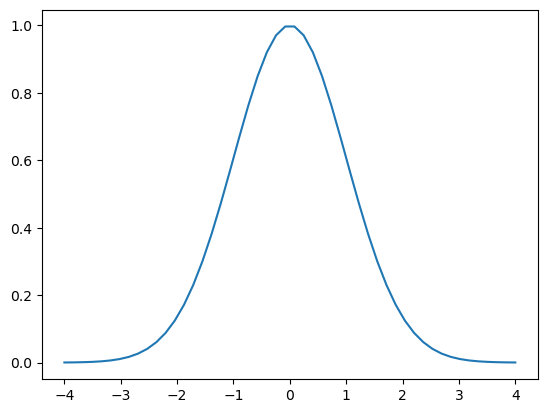

In [4]:
# x axis
x = np.linspace(start=-4, stop=4)
# plot our function
plt.plot(x, gaussian(x))

(array([2., 1., 0., 1., 2., 1., 3., 2., 0., 1.]),
 array([ 52.25 ,  58.474,  64.698,  70.922,  77.146,  83.37 ,  89.594,
         95.818, 102.042, 108.266, 114.49 ]),
 <BarContainer object of 10 artists>)

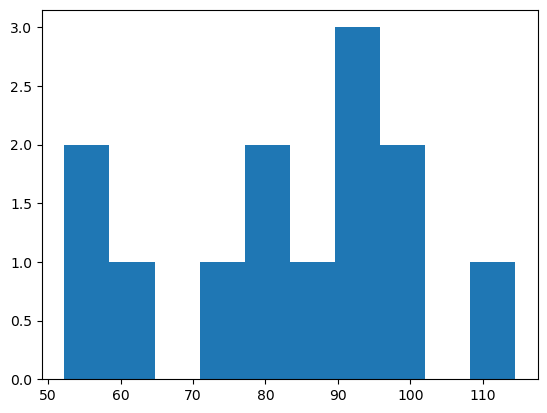

In [16]:
data = np.asarray([52.25, 54.76, 81, 114.49, 86.49, 76.25, 90.25, 96.04,77.44, 92.6, 93.8, 100.2, 60.8])
# plot a histogram around the vector
plt.hist(data, bins=10)

In [20]:
def fit_kde(f, data, bandwidth=1):
    """ Fits a KDE.
    Args:
        f (function): Kernel function; see gaussian(...)
        data (list): vector of real-values.
        bandwidth (float): smoothing parameter, h.
    Returns:
        A function that computes density at a point along x.
    """
    def kde(x):
        summation = 0.
        N = len(data)
        # get density of variable at each kernel
        for x_i in data:
            density = f(x, mu=x_i, sigma=bandwidth)
            summation += density
        return summation / N
    return kde


In [21]:
f = fit_kde(gaussian, data=data, bandwidth=5)
f

<function __main__.fit_kde.<locals>.kde(x)>

In [22]:
print(f(90))  # high density in the 90-100 range.
print(f(10))  # no density in this area.
print(f(52.3))  # some density in the 50s range.

0.32871638788283924
2.435971048583975e-17
0.16320887774267132


In [24]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
def viz(bandwidth):
    """ Visualizes how different bandwidths change f(x)
    """
    # fit a KDE given our earlier data but using custom bandwidths
    f = fit_kde(gaussian, data=data, bandwidth=bandwidth)
    # plot along the x-axis and get its density
    x = np.linspace(start=40, stop=130)
    plt.plot(x, f(x))
# make a widget to control bandwidth, h.
bandwidth_widget = widgets.FloatSlider(min=0.1, max=20, value=1, step=0.5, description="Bandwidth:")
interactive(viz, bandwidth=bandwidth_widget)

interactive(children=(FloatSlider(value=1.0, description='Bandwidth:', max=20.0, min=0.1, step=0.5), Output())…